In [1]:
import pandas as pd 

In [7]:
df = pd.read_csv('http://51.91.120.89/extras/world.csv')
df
#dane są z 3 lad od 2015 do 2018
#dane trzeba oczyscic bo zawieraja smieciowe dane

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940,2015
2,2,Algeria,Middle East and Northern Africa,68.0,5.605,0.939290,1.077720,0.617660,0.285790,0.173830,0.078220,2.432090,2015
3,3,Angola,Sub-Saharan Africa,137.0,4.033,0.757780,0.860400,0.166830,0.103840,0.071220,0.123440,1.949390,2015
4,4,Argentina,Latin America and Caribbean,30.0,6.574,1.053510,1.248230,0.787230,0.449740,0.084840,0.114510,2.836000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,490,Venezuela,Latin America and Caribbean,82.0,5.250,1.128431,1.431338,0.617144,0.153997,0.064491,0.065020,1.789464,2017
491,491,Vietnam,Southeastern Asia,94.0,5.074,0.788548,1.277491,0.652169,0.571056,0.087633,0.234968,1.462319,2017
492,492,Yemen,Middle East and Northern Africa,146.0,3.593,0.591683,0.935382,0.310081,0.249464,0.056767,0.104125,1.345601,2017
493,493,Zambia,Sub-Saharan Africa,116.0,4.514,0.636407,1.003187,0.257836,0.461603,0.078214,0.249580,1.826705,2017


In [11]:
#są dwie metody na usuwanie rzezcy z df 1. del druga to drop
df.drop(columns="Unnamed: 0",inplace=True) 
#jest to metoda generyczna mozemy usuwac kolumne lub kolumny gdy podamy jedno kolumne lub ich liste to beda one usuniebe

KeyError: "['Unnamed: 0'] not found in axis"

In [15]:
df
#do pivotowania danych sluzy metoda pivot_table()
pd.pivot_table(df, index='Year', values='Happiness Score' )
#jako pierwszy obiekt data frame potem dajemy indeks czyli nazwe kolumny do zrobienia indeksu,
# nastepnie podajemy jakie wartosci maja byc prezentowane w tej kolumnie
#podczas pivotowania automatycznie jest wykonywana agregacja danych 
#powyzsze oznacza ze wartosc przypisana do happiness score to w rzeczywistosci srednia

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [16]:
#kontrolnie sprawdzam jakie sa unkalne wartosci w year
df.Year.unique()

array([2015, 2016, 2017], dtype=int64)

In [19]:
#filtrowanie danych z 2016 r w zbiorze danych
df[df.Year==2016] #zwraca elementy zbioru ktore spelniaja kryterium
df[df.Year==2016]['Happiness Score'] # zwraca tylko kolumne
df[df.Year==2016]['Happiness Score'].mean() #zwraca srednia tylko jednej kolumny

165    3.360
166    4.655
167    6.355
168    3.866
169    6.650
       ...  
325    6.084
326    5.061
327    3.724
328    4.795
329    4.193
Name: Happiness Score, Length: 165, dtype: float64

In [21]:
#teraz wykonamy bardziej szczegolowy podział danych szczescia w podziale na regiony i lata
pd.pivot_table(df, index=['Region','Year'], values='Happiness Score' ) 
#powyzsze oznacza że indeks moze być wielopoziomowy -> tutaj jak widać jest robiona agregacja i srednia

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

In [24]:
#teraz wykoanny zostanie w alteranatywny sposob pivot danych
pd.pivot_table(df, index=['Region','Country'], values=['Happiness Score', 'Family'] )
pd.pivot_table(df, index=['Region','Country'], values=['Happiness Score', 'Family'], columns='Year' )
#index 
#colmns
#columns oznacza z jakich wierszy df maja byc wziete naglowki do nowego df
#powyzsze zmienia uklad danych i nie jest liczona srednia poniewaz na dany kraj w danym roku jest tylko jedna informacja


Family                     Happiness Score  \
Year                                 2015      2016      2017            2015   
Region                                                                          
Australia and New Zealand        1.314450  1.138770  1.529119        7.285000   
Central and Eastern Europe       1.053042  0.861855  1.282285        5.332931   
Eastern Asia                     1.099427  0.910428  1.310970        5.626167   
Latin America and Caribbean      1.104720  0.898432  1.290156        6.144682   
Middle East and Northern Africa  0.920490  0.695644  1.095511        5.406900   
North America                    1.284860  1.071960  1.450635        7.273000   
Southeastern Asia                0.940468  0.791756  1.249948        5.317444   
Southern Asia                    0.645321  0.480694  0.931875        4.580857   
Sub-Saharan Africa               0.809085  0.593656  0.953919        4.202800   
Western Europe                   1.247302  1.042452  1.444946        6.689619   

                                                     
Year                                 2016      2017  
Region                                               
Australia and New Zealand        7.323500  7.299000  
Central and Eastern Europe       5.370690  5.409931  
Eastern Asia                     5.624167  5.646667  
Latin America and Caribbean      6.101750  5.957818  
Middle East and Northern Africa  5.386053  5.369684  
North America                    7.254000  7.154500  
Southeastern Asia                5.338889  5.444875  
Southern Asia                    4.563286  4.628429  
Sub-Saharan Africa               4.136421  4.111949  
Western Europe                   6.685667  6.703714

In [26]:
#ponizej przyklad ktory zawiera policzone srednie dla regionu
pd.pivot_table(df, index=['Region'], values=['Happiness Score', 'Family'], columns='Year' )
#czyli pivot sluzy do zmiany struktury df zeby był on lepiej zaprezentowany lub na potrzeby innego ujecia danych. 
# to ulatwia nowe spojrzenie 

Family                     Happiness Score  \
Year                                 2015      2016      2017            2015   
Region                                                                          
Australia and New Zealand        1.314450  1.138770  1.529119        7.285000   
Central and Eastern Europe       1.053042  0.861855  1.282285        5.332931   
Eastern Asia                     1.099427  0.910428  1.310970        5.626167   
Latin America and Caribbean      1.104720  0.898432  1.290156        6.144682   
Middle East and Northern Africa  0.920490  0.695644  1.095511        5.406900   
North America                    1.284860  1.071960  1.450635        7.273000   
Southeastern Asia                0.940468  0.791756  1.249948        5.317444   
Southern Asia                    0.645321  0.480694  0.931875        4.580857   
Sub-Saharan Africa               0.809085  0.593656  0.953919        4.202800   
Western Europe                   1.247302  1.042452  1.444946        6.689619   

                                                     
Year                                 2016      2017  
Region                                               
Australia and New Zealand        7.323500  7.299000  
Central and Eastern Europe       5.370690  5.409931  
Eastern Asia                     5.624167  5.646667  
Latin America and Caribbean      6.101750  5.957818  
Middle East and Northern Africa  5.386053  5.369684  
North America                    7.254000  7.154500  
Southeastern Asia                5.338889  5.444875  
Southern Asia                    4.563286  4.628429  
Sub-Saharan Africa               4.136421  4.111949  
Western Europe                   6.685667  6.703714

In [37]:
#uzyjemy dodatkowego parametru -> wlasnej funkcji agregujacej do pracy pivota ktora doda min i max do danego roku dla danego 
pd.pivot_table(df, 
               index=['Region'], 
               values=['Happiness Score', 'Family'], 
               columns='Year', 
               aggfunc=pd.np.median) #wywolanie funkcji z biblioteki pandas

df1 = pd.pivot_table(df, 
               index=['Region'], 
               values=['Happiness Score', 'Family'], 
               columns='Year', 
               aggfunc=[min,max]) #wywolane funkcje można podawać w liście
#aggfunc - parametr wywoluje wlasna funkcje ktora zastepuje funkcje agregujaca ktora usrednia dane jezeli jest to mozliwe
df1

C:\Users\kurs\AppData\Local\Temp/ipykernel_4060/3837984599.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  aggfunc=pd.np.median) #wywolanie funkcji z biblioteki pandas


min                                     \
                                  Family                    Happiness Score   
Year                                2015     2016      2017            2015   
Region                                                                        
Australia and New Zealand        1.30923  1.10476  1.510042           7.284   
Central and Eastern Europe       0.38562  0.19249  0.570615           4.218   
Eastern Asia                     0.94675  0.72194  1.128274           4.874   
Latin America and Caribbean      0.74302  0.29561  0.640450           4.518   
Middle East and Northern Africa  0.47489  0.14866  0.396103           3.006   
North America                    1.24711  1.04782  1.419921           7.119   
Southeastern Asia                0.62736  0.53750  1.006238           3.819   
Southern Asia                    0.30285  0.11037  0.581543           3.575   
Sub-Saharan Africa               0.00000  0.00000  0.000000           2.839   
Western Europe                   0.89318  0.70697  1.131363           4.857   

                                                   max                     \
                                                Family                      
Year                              2016   2017     2015     2016      2017   
Region                                                                      
Australia and New Zealand        7.313  7.284  1.31967  1.17278  1.548195   
Central and Eastern Europe       4.217  4.096  1.34043  1.16810  1.548969   
Eastern Asia                     4.907  4.955  1.30060  1.08983  1.493011   
Latin America and Caribbean      4.028  3.603  1.30477  1.11111  1.507285   
Middle East and Northern Africa  3.069  3.462  1.22393  0.99537  1.376290   
North America                    7.104  6.993  1.32261  1.09610  1.481349   
Southeastern Asia                3.907  4.168  1.26504  1.04477  1.425792   
Southern Asia                    3.360  3.794  1.10395  0.90836  1.340127   
Sub-Saharan Africa               2.905  2.693  1.18468  0.96053  1.384789   
Western Europe                   5.033  5.195  1.40223  1.18326  1.610574   

                                                               
                                Happiness Score                
Year                                       2015   2016   2017  
Region                                                         
Australia and New Zealand                 7.286  7.334  7.314  
Central and Eastern Europe                6.505  6.596  6.609  
Eastern Asia                              6.298  6.379  6.422  
Latin America and Caribbean               7.226  7.087  7.079  
Middle East and Northern Africa           7.278  7.267  7.213  
North America                             7.427  7.404  7.316  
Southeastern Asia                         6.798  6.739  6.572  
Southern Asia                             5.253  5.196  5.269  
Sub-Saharan Africa                        5.477  5.648  5.629  
Western Europe                            7.587  7.526  7.537

In [38]:
#utworzona struktura kolumn w df tworzy krotke ktora sklada sie z trzech elementow - zeby to podejrzeć uzywam df1.columns
df1.columns

MultiIndex([('min',          'Family', 2015),
            ('min',          'Family', 2016),
            ('min',          'Family', 2017),
            ('min', 'Happiness Score', 2015),
            ('min', 'Happiness Score', 2016),
            ('min', 'Happiness Score', 2017),
            ('max',          'Family', 2015),
            ('max',          'Family', 2016),
            ('max',          'Family', 2017),
            ('max', 'Happiness Score', 2015),
            ('max', 'Happiness Score', 2016),
            ('max', 'Happiness Score', 2017)],
           names=[None, None, 'Year'])

In [40]:
#żeby posortować kolumne w takim df1 trzeba podawać pełną krotkę
df1.sort_values(('max','Family',2015))

min                                     \
                                  Family                    Happiness Score   
Year                                2015     2016      2017            2015   
Region                                                                        
Southern Asia                    0.30285  0.11037  0.581543           3.575   
Sub-Saharan Africa               0.00000  0.00000  0.000000           2.839   
Middle East and Northern Africa  0.47489  0.14866  0.396103           3.006   
Southeastern Asia                0.62736  0.53750  1.006238           3.819   
Eastern Asia                     0.94675  0.72194  1.128274           4.874   
Latin America and Caribbean      0.74302  0.29561  0.640450           4.518   
Australia and New Zealand        1.30923  1.10476  1.510042           7.284   
North America                    1.24711  1.04782  1.419921           7.119   
Central and Eastern Europe       0.38562  0.19249  0.570615           4.218   
Western Europe                   0.89318  0.70697  1.131363           4.857   

                                                   max                     \
                                                Family                      
Year                              2016   2017     2015     2016      2017   
Region                                                                      
Southern Asia                    3.360  3.794  1.10395  0.90836  1.340127   
Sub-Saharan Africa               2.905  2.693  1.18468  0.96053  1.384789   
Middle East and Northern Africa  3.069  3.462  1.22393  0.99537  1.376290   
Southeastern Asia                3.907  4.168  1.26504  1.04477  1.425792   
Eastern Asia                     4.907  4.955  1.30060  1.08983  1.493011   
Latin America and Caribbean      4.028  3.603  1.30477  1.11111  1.507285   
Australia and New Zealand        7.313  7.284  1.31967  1.17278  1.548195   
North America                    7.104  6.993  1.32261  1.09610  1.481349   
Central and Eastern Europe       4.217  4.096  1.34043  1.16810  1.548969   
Western Europe                   5.033  5.195  1.40223  1.18326  1.610574   

                                                               
                                Happiness Score                
Year                                       2015   2016   2017  
Region                                                         
Southern Asia                             5.253  5.196  5.269  
Sub-Saharan Africa                        5.477  5.648  5.629  
Middle East and Northern Africa           7.278  7.267  7.213  
Southeastern Asia                         6.798  6.739  6.572  
Eastern Asia                              6.298  6.379  6.422  
Latin America and Caribbean               7.226  7.087  7.079  
Australia and New Zealand                 7.286  7.334  7.314  
North America                             7.427  7.404  7.316  
Central and Eastern Europe                6.505  6.596  6.609  
Western Europe                            7.587  7.526  7.537

In [41]:
#istnieje możliwość barwnego przedstawienia danych przy użyciu bubuiteki seaborn 
df1 = pd.pivot_table(df, 
               index=['Region'], 
               values=['Happiness Score', 'Family'], 
               columns='Year', 
               aggfunc=pd.np.median) #wywolanie funkcji z biblioteki pandas

C:\Users\kurs\AppData\Local\Temp/ipykernel_4060/4250885511.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  aggfunc=pd.np.median) #wywolanie funkcji z biblioteki pandas


Family                     Happiness Score  \
Year                                 2015      2016      2017            2015   
Region                                                                          
Australia and New Zealand        1.314450  1.138770  1.529119           7.285   
Central and Eastern Europe       1.106140  0.931640  1.384369           5.286   
Eastern Asia                     1.067175  0.898225  1.323678           5.729   
Latin America and Caribbean      1.146430  0.934795  1.327717           6.149   
Middle East and Northern Africa  1.000120  0.833090  1.155647           5.262   
North America                    1.284860  1.071960  1.450635           7.273   
Southeastern Asia                1.020000  0.867580  1.275968           5.360   
Southern Asia                    0.431060  0.292470  0.754373           4.565   
Sub-Saharan Africa               0.878375  0.631160  0.993025           4.272   
Western Europe                   1.289070  1.086720  1.472520           6.937   

                                                 
Year                               2016    2017  
Region                                           
Australia and New Zealand        7.3235  7.2990  
Central and Eastern Europe       5.4880  5.3950  
Eastern Asia                     5.6465  5.6550  
Latin America and Caribbean      6.1260  6.0395  
Middle East and Northern Africa  5.3030  5.3360  
North America                    7.2540  7.1545  
Southeastern Asia                5.2790  5.3460  
Southern Asia                    4.6430  4.6080  
Sub-Saharan Africa               4.1300  4.1200  
Western Europe                   6.9070  6.8910

In [42]:
import seaborn as sns

In [43]:
#wycinam tylko dane z Family
df2 = df1[df1.columns[:3]]

In [44]:
df2 #mam wycinek danych

min                   
                                  Family                   
Year                                2015     2016      2017
Region                                                     
Australia and New Zealand        1.30923  1.10476  1.510042
Central and Eastern Europe       0.38562  0.19249  0.570615
Eastern Asia                     0.94675  0.72194  1.128274
Latin America and Caribbean      0.74302  0.29561  0.640450
Middle East and Northern Africa  0.47489  0.14866  0.396103
North America                    1.24711  1.04782  1.419921
Southeastern Asia                0.62736  0.53750  1.006238
Southern Asia                    0.30285  0.11037  0.581543
Sub-Saharan Africa               0.00000  0.00000  0.000000
Western Europe                   0.89318  0.70697  1.131363

<AxesSubplot:xlabel='None-None-Year', ylabel='Region'>

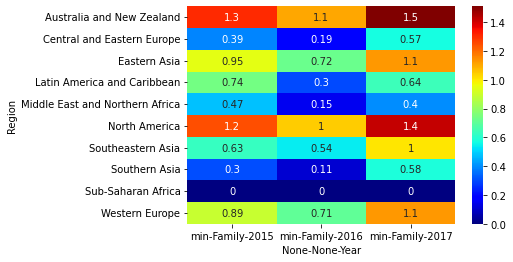

In [52]:
sns.heatmap(
    df2, 
    annot=True,
    cmap='jet' #zmienia domyślny schemat barwny 
) #generuje mape ciepła które wskazuja wartosci wieksze i mniejsze na wykresie, 
#to moze sie przydac gdy analizujemy wartosci pewnej zmiennej 